In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
!pip install numpy matplotlib netcdf4
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset as NetCDFFile
!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1"
!pip install basemap
from mpl_toolkits.basemap import Basemap
!pip install cartopy
import cartopy

In [135]:
# installing the nessesary libraries
%%capture
!pip install cartopy
!pip install --upgrade matplotlib
!pip install https://github.com/matplotlib/basemap/archive/v1.3.3rel.tar.gz
!apt-get install -y basemap-data-hires
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install geopandas
!pip install plotly
!pip install basemap-data-hires




To print the variable names that exist in a netCDF file, you can use the variables attribute of the netCDF4 Dataset object, like this:

In [2]:
import netCDF4 as nc

# Load the netCDF file
filename = "/content/drive/MyDrive/iPad/Notes/Διάφορα/Για Θένια/CURENTS/mercator_paria2_20170510.nc"  # .nc file path from my drive
data = nc.Dataset(filename)

# Print the variable names
print(data.variables.keys())


dict_keys(['time', 'lon', 'lat', 'depth', 'vo', 'uo', 'thetao'])


This will print a list of all the variable names that exist in the netCDF file. You can then use these names to access specific variables and their values in your code. Note that the variable names are case-sensitive, so make sure you use the correct capitalization when accessing them.

Based on the list of variable names you provided, it seems like the uo and vo variables correspond to the zonal and meridional components of the sea current velocity, respectively. The lon and lat variables correspond to the longitude and latitude coordinates of the data points, and the depth variable corresponds to the depth of the data points. The time variable likely represents the time or date associated with the data.

The thetao variable is not related to the sea current velocity, but rather represents the potential temperature of the water at each data point.

To plot the sea current velocity on a map using the uo and vo variables, you can adapt the code I provided earlier to use these variable names instead. Here is an example:

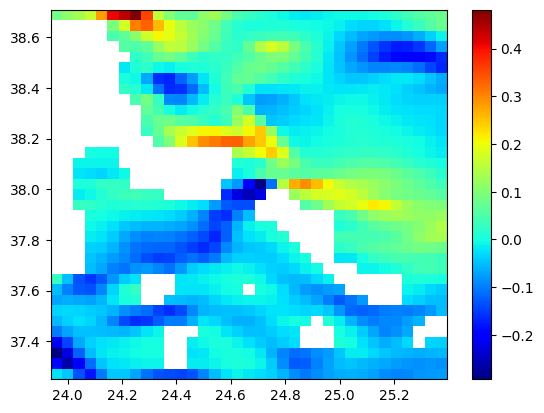

In [143]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

# Load the netCDF file
nc = Dataset('/content/drive/MyDrive/iPad/Notes/Διάφορα/Για Θένια/CURENTS/mercator_paria2_20170110.nc') # .nc file path from my drive

# Get the longitude and latitude values
lon = nc.variables['lon'][:]
lat = nc.variables['lat'][:]

# Define the desired latitude and longitude limits
lon_min, lon_max = 23.94, 25.38
lat_min, lat_max = 37.26, 38.7

# Find the indices of the longitude and latitude values that are within the desired limits
lon_inds = np.where((lon >= lon_min) & (lon <= lon_max))[0]
lat_inds = np.where((lat >= lat_min) & (lat <= lat_max))[0]

# Load the uo and vo variables with the desired limits
uo = nc.variables['uo'][:, :, lat_inds[0]:lat_inds[-1]+1, lon_inds[0]:lon_inds[-1]+1]
vo = nc.variables['vo'][:, :, lat_inds[0]:lat_inds[-1]+1, lon_inds[0]:lon_inds[-1]+1]

# Subset the longitude and latitude values with the desired limits
lon = lon[lon_inds]
lat = lat[lat_inds]

# Plot the uo variable
plt.pcolormesh(lon, lat, uo[0, 0, :, :], cmap='jet')
plt.colorbar()
plt.show()




/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:6900: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


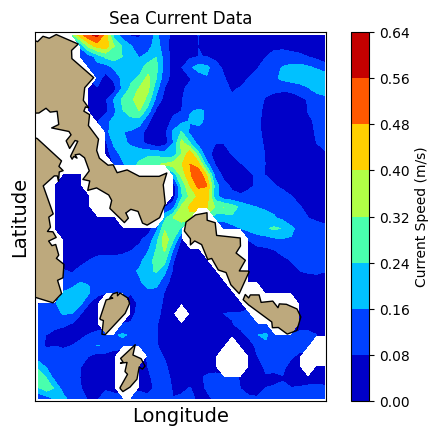

In [144]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load the netCDF file
nc = Dataset('/content/drive/MyDrive/iPad/Notes/Διάφορα/Για Θένια/CURENTS/mercator_paria2_20170110.nc') # .nc file path from my drive

# Get the longitude and latitude values
lon = nc.variables['lon'][:]
lat = nc.variables['lat'][:]

# Define the desired latitude and longitude limits
lon_min, lon_max = 23.94, 25.38
lat_min, lat_max = 37.26, 38.7

# Find the indices of the longitude and latitude values that are within the desired limits
lon_inds = np.where((lon >= lon_min) & (lon <= lon_max))[0]
lat_inds = np.where((lat >= lat_min) & (lat <= lat_max))[0]

# Load the uo and vo variables with the desired limits
uo = nc.variables['uo'][:, :, lat_inds[0]:lat_inds[-1]+1, lon_inds[0]:lon_inds[-1]+1]
vo = nc.variables['vo'][:, :, lat_inds[0]:lat_inds[-1]+1, lon_inds[0]:lon_inds[-1]+1]

# Subset the longitude and latitude values with the desired limits
lon = lon[lon_inds]
lat = lat[lat_inds]

# set up the map projection
m = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max,
            projection='merc', resolution='i', lat_0=(lat_max + lat_min)/2., lon_0=(lon_max + lon_min)/2.)

# Add a coastline
m.drawcoastlines()

# Change land and ocean colors
m.fillcontinents(color='#BDA97D', lake_color='#D9FFFF')

# compute native map projection coordinates of lat/lon grid.
x, y = m(*np.meshgrid(lon, lat))

# calculate current speed and direction from uo and vo
spd = np.sqrt(uo[0, 0, :, :]**2 + vo[0, 0, :, :]**2)
dir = np.arctan2(uo[0, 0, :, :], vo[0, 0, :, :]) * 180 / np.pi

# plot current speed as a contour map
cs = m.contourf(x, y, spd, cmap='jet')

cbar = plt.colorbar(cs)
cbar.set_label('Current Speed (m/s)')


# add colorbar with label


# add labels for longitude and latitude
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
           

plt.title('Sea Current Data')
plt.show()


In [ ]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load the netCDF file
nc = Dataset('/content/drive/MyDrive/iPad/Notes/Διάφορα/Για Θένια/CURENTS/mercator_paria2_20170112.nc') # .nc file path from my drive 
wind_nc = Dataset("/content/drive/MyDrive/iPad/Notes/Διάφορα/Για Θένια/WIND/20170112.nc") # .nc file path from my drive

# Get the longitude and latitude values
lon = nc.variables['lon'][:]
lat = nc.variables['lat'][:]
wind_lon = wind_nc.variables['longitude'][:]
wind_lat = wind_nc.variables['latitude'][:]

# Define the desired latitude and longitude limits
lon_min, lon_max = 23.94, 25.38
lat_min, lat_max = 37.26, 38.7

# Find the indices of the longitude and latitude values that are within the desired limits
lon_inds = np.where((lon >= lon_min) & (lon <= lon_max))[0]
lat_inds = np.where((lat >= lat_min) & (lat <= lat_max))[0]
lon_inds_wind = np.where((wind_lon >= lon_min) & (wind_lon <= lon_max))[0]
lat_inds_wind = np.where((wind_lat >= lat_min) & (wind_lat <= lat_max))[0]

# Load the uo and vo variables with the desired limits
uo = nc.variables['uo'][:, :, lat_inds[0]:lat_inds[-1]+1, lon_inds[0]:lon_inds[-1]+1]
vo = nc.variables['vo'][:, :, lat_inds[0]:lat_inds[-1]+1, lon_inds[0]:lon_inds[-1]+1]
uo_wind = wind_nc.variables['u10'][:, lat_inds_wind[0]:lat_inds_wind[-1]+1, lon_inds_wind[0]:lon_inds_wind[-1]+1]
vo_wind = wind_nc.variables['v10'][:, lat_inds_wind[0]:lat_inds_wind[-1]+1, lon_inds_wind[0]:lon_inds_wind[-1]+1]


# Subset the longitude and latitude values with the desired limits
lon = lon[lon_inds]
lat = lat[lat_inds]
wind_lon = wind_lon[lon_inds_wind]
wind_lat = wind_lat[lat_inds_wind]

# calculate thw wind speed 
wind_spd = np.sqrt(uo_wind[0, :, :]**2 + vo_wind[0, :, :]**2)
wind_dir = np.arctan2(uo_wind[0, :, :], vo_wind[0, :, :]) * 180 / np.pi

# set up the map projection
m = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max,
            projection='merc', resolution='f', lat_0=(lat_max + lat_min)/2., lon_0=(lon_max + lon_min)/2.)

# Add a coastline
m.drawcoastlines()

# Change land and ocean colors
m.fillcontinents(color='#BDA97D', lake_color='#D9FFFF')

# compute native map projection coordinates of lat/lon grid.
x, y = m(*np.meshgrid(lon, lat))
x_wind, y_wind = m(*np.meshgrid(wind_lon, wind_lat))

# calculate current speed and direction from uo and vo
spd = np.sqrt(uo[0, 0, :, :]**2 + vo[0, 0, :, :]**2)
dir = np.arctan2(uo[0, 0, :, :], vo[0, 0, :, :]) * 180 / np.pi

# plot current speed as a contour map
cs = m.contourf(x, y, spd, cmap='jet')
cbar = plt.colorbar(cs)
cbar.set_label('Current Speed (m/s)')

# add the wind 
m.quiver(x_wind, y_wind, uo_wind[0, :, :], vo_wind[0, :, :],  wind_spd, scale=100, width=0.003, color='black', linewidth=1.5)



# add labels for longitude and latitude
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
           

plt.title('Sea Current and Wind Speed Data (72h-Winter)')
plt.savefig('/content/drive/MyDrive/iPad/Notes/Διάφορα/Για Θένια/Plots_wind+current/72h_winter.png')